In [1]:
import pandas as pd

In [2]:
auto_data = pd.read_csv('../Data Sets/Auto.csv')

In [3]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


$$
\text{mpg} = \beta_0 + \beta_1 \times \text{horsepower} + \beta_2 \times \text{horsepower}^2
$$

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_degree_two = PolynomialFeatures(degree=2)

In [7]:
auto_data = auto_data[auto_data['horsepower'] != '?']
X_quadratic = polynomial_degree_two.fit_transform(auto_data[['horsepower']])

In [8]:
X_quadratic[0]

array([1.00e+00, 1.30e+02, 1.69e+04])

In [9]:
y = auto_data['mpg']

In [10]:
from statsmodels.api import OLS

In [11]:
model = OLS(y, X_quadratic).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           5.40e-99
Time:                        16:35:40   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model_quadratic = LinearRegression()

In [15]:
model_quadratic.fit(X_quadratic, y)

LinearRegression()

In [16]:
model_quadratic.intercept_

56.90009970211379

In [17]:
model_quadratic.coef_

array([ 0.        , -0.46618963,  0.00123054])

In [18]:
model_linear = LinearRegression()

In [19]:
X_linear = auto_data[['horsepower']]

In [20]:
model_linear.fit(X_linear, y)

LinearRegression()

In [21]:
model_linear.intercept_

39.935861021170474

In [22]:
model_linear.coef_

array([-0.15784473])

$$
\text{mpg} = \beta_0 + \beta_1 \times \text{horsepower} + \beta_2 \times \text{horsepower}^2 + \beta_3 \times \text{horsepower}^3 + \beta_4 \times \text{horsepower}^4 + \beta_5 \times \text{horsepower}^5
$$

In [23]:
polynomial_degree_five = PolynomialFeatures(degree=5)

In [24]:
X_quintic = polynomial_degree_five.fit_transform(auto_data[['horsepower']])

In [25]:
X_quintic[0]

array([1.00000e+00, 1.30000e+02, 1.69000e+04, 2.19700e+06, 2.85610e+08,
       3.71293e+10])

In [26]:
model_quintic = LinearRegression()

In [28]:
model_quintic.fit(X_quintic, y)

LinearRegression()

In [29]:
model_quintic.intercept_

-32.23034985280506

In [30]:
model_quintic.coef_

array([ 0.00000000e+00,  3.70010325e+00, -7.14240251e-02,  5.93108365e-04,
       -2.28107588e-06,  3.32955263e-09])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')

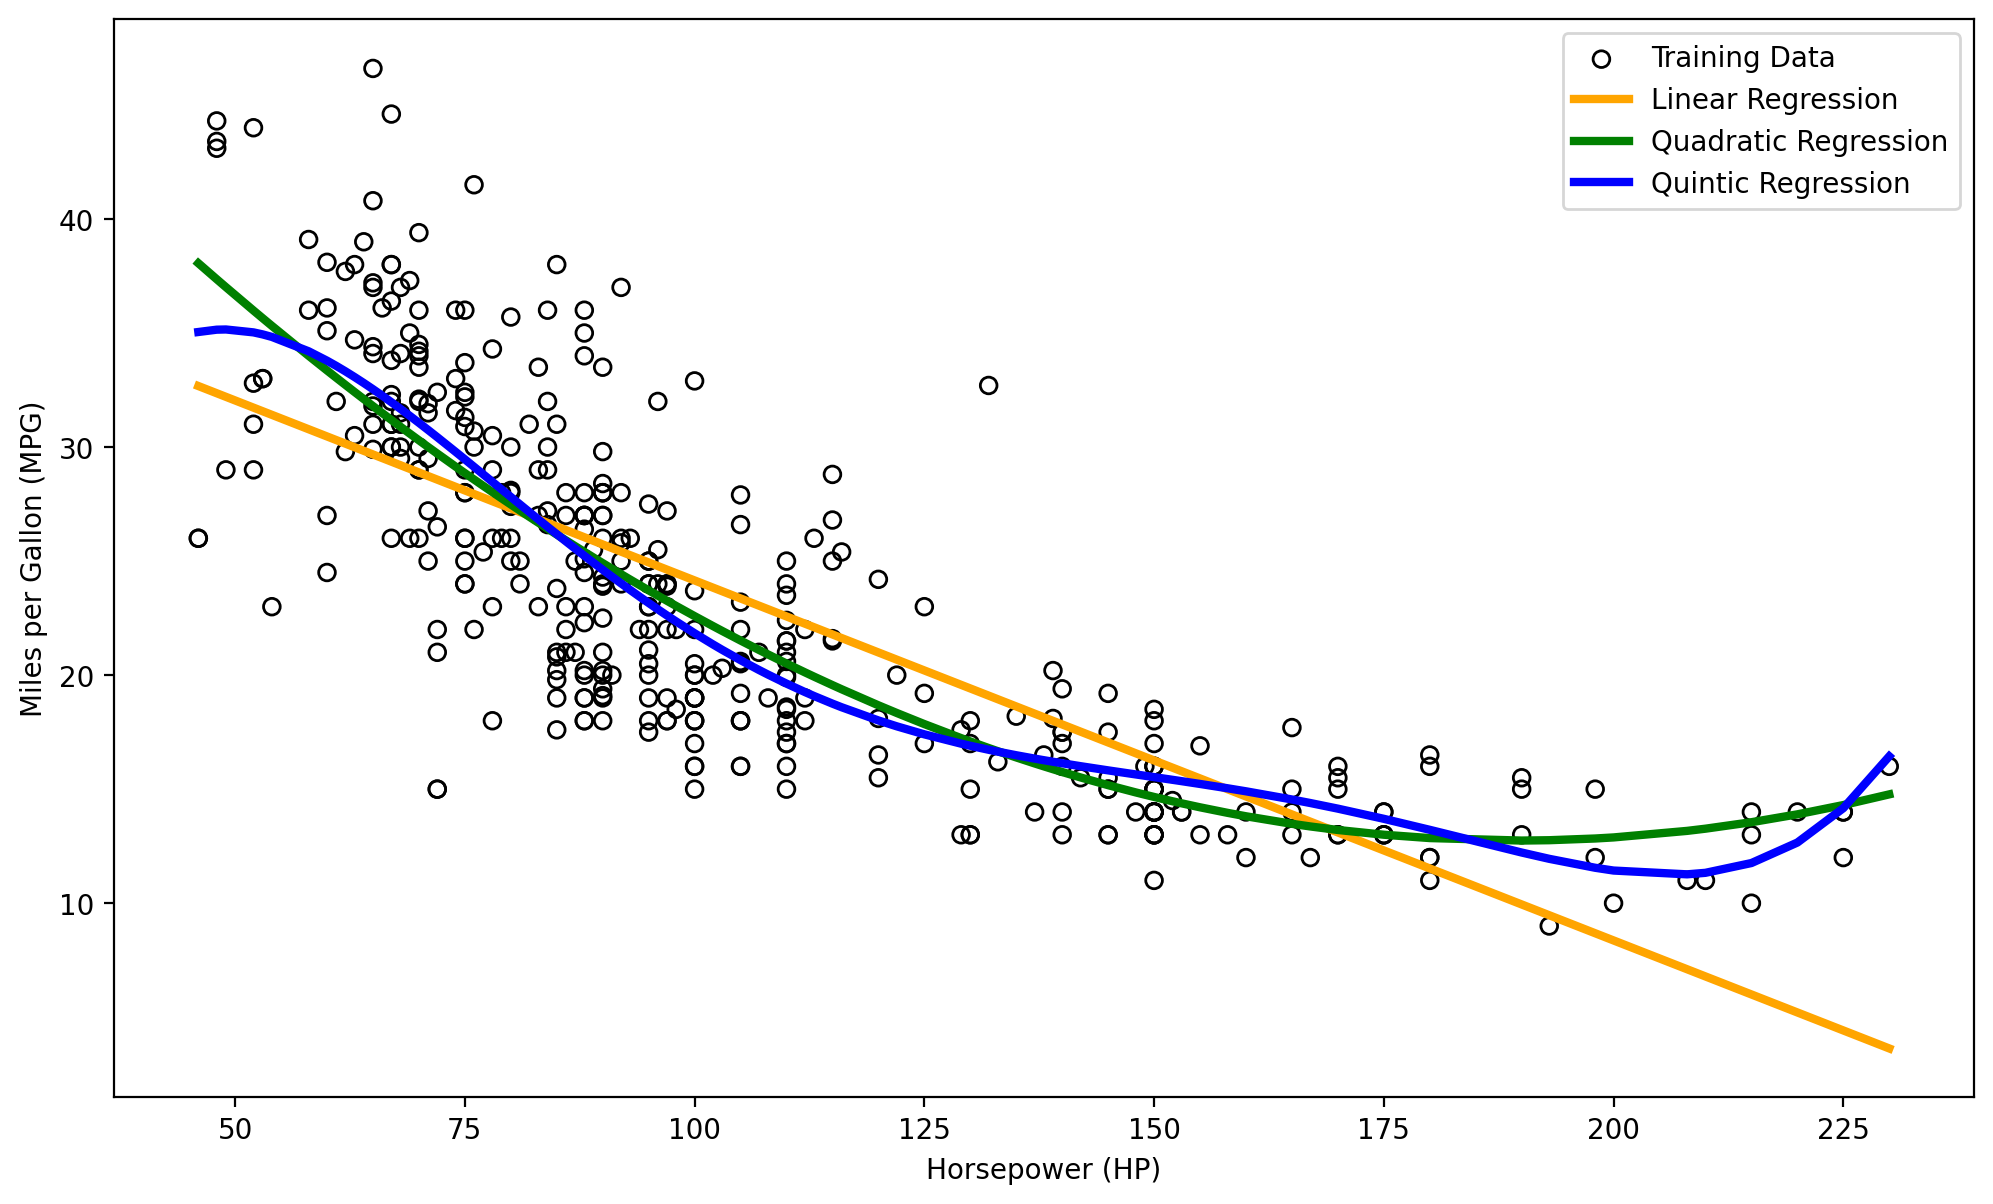

In [45]:
plt.figure(figsize=(12, 7), dpi=200)
sns.scatterplot(
    data=auto_data,
    x='horsepower',
    y='mpg',
    facecolor='none',
    edgecolor='black',
    label='Training Data',
    linewidth=1
)
plt.xlabel('Horsepower (HP)')
plt.ylabel('Miles per Gallon (MPG)')

def plot_model_predictions(model, X, color, label):
    fitted_values = model.predict(X)

    sns.lineplot(
        data=auto_data,
        x='horsepower',
        y=fitted_values,
        color=color,
        label=label,
        linewidth=3
    )

plot_model_predictions(model_linear, X_linear, 'orange', 'Linear Regression')
plot_model_predictions(model_quadratic, X_quadratic, 'green', 'Quadratic Regression')
plot_model_predictions(model_quintic, X_quintic, 'blue', 'Quintic Regression')